## Breast Cancer Part 3 and 4

***

The brca dataset from the dslabs package contains information about breast cancer diagnosis biopsy samples for tumors that were determined to be either benign (not cancer) and malignant (cancer). The brca object is a list consisting of:

brca$y: a vector of sample classifications ("B" = benign or "M" = malignant)

brca$x: a matrix of numeric features describing properties of the shape and size of cell nuclei extracted from biopsy microscope images

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap
import statsmodels.api as sm
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport
import graphviz

# import xgboost as xgb
# from xgboost import XGBClassifier, XGBRegressor
# from xgboost import to_graphviz, plot_importance

#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


#from tpot import TPOTClassifier, TPOTRegressor
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce


np.random.seed(0)

from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("brca.csv")

In [3]:
df

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.54,14.36,87.46,566.30,0.10,0.08,0.07,0.05,0.19,0.06,0.27,0.79,2.06,23.56,0.01,0.01,0.02,0.01,0.02,0.00,15.11,19.26,99.70,711.20,0.14,0.18,0.24,0.13,0.30,0.07,B
1,13.08,15.71,85.63,520.00,0.11,0.13,0.05,0.03,0.20,0.07,0.19,0.75,1.38,14.67,0.00,0.02,0.02,0.01,0.02,0.00,14.50,20.49,96.09,630.50,0.13,0.28,0.19,0.07,0.32,0.08,B
2,9.50,12.44,60.34,273.90,0.10,0.06,0.03,0.02,0.18,0.07,0.28,0.98,1.91,15.70,0.01,0.01,0.02,0.01,0.02,0.00,10.23,15.66,65.13,314.90,0.13,0.11,0.09,0.06,0.24,0.08,B
3,13.03,18.42,82.61,523.80,0.09,0.04,0.03,0.03,0.15,0.06,0.18,2.34,1.17,14.16,0.00,0.00,0.01,0.01,0.03,0.00,13.30,22.81,84.46,545.90,0.10,0.05,0.05,0.05,0.20,0.06,B
4,8.20,16.84,51.71,201.90,0.09,0.06,0.02,0.01,0.18,0.07,0.16,0.96,1.09,8.21,0.01,0.02,0.02,0.01,0.03,0.00,8.96,21.96,57.26,242.20,0.13,0.14,0.07,0.03,0.31,0.07,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,20.92,25.09,143.00,1347.00,0.11,0.22,0.32,0.15,0.21,0.07,0.96,1.03,8.76,118.80,0.01,0.04,0.08,0.03,0.02,0.01,24.29,29.41,179.10,1819.00,0.14,0.42,0.66,0.25,0.29,0.10,M
565,21.56,22.39,142.00,1479.00,0.11,0.12,0.24,0.14,0.17,0.06,1.18,1.26,7.67,158.70,0.01,0.03,0.05,0.02,0.01,0.00,25.45,26.40,166.10,2027.00,0.14,0.21,0.41,0.22,0.21,0.07,M
566,20.13,28.25,131.20,1261.00,0.10,0.10,0.14,0.10,0.18,0.06,0.77,2.46,5.20,99.04,0.01,0.02,0.04,0.02,0.02,0.00,23.69,38.25,155.00,1731.00,0.12,0.19,0.32,0.16,0.26,0.07,M
567,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,0.16,0.06,0.46,1.07,3.42,48.55,0.01,0.04,0.05,0.02,0.01,0.00,18.98,34.12,126.70,1124.00,0.11,0.31,0.34,0.14,0.22,0.08,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x.radius_mean        569 non-null    float64
 1   x.texture_mean       569 non-null    float64
 2   x.perimeter_mean     569 non-null    float64
 3   x.area_mean          569 non-null    float64
 4   x.smoothness_mean    569 non-null    float64
 5   x.compactness_mean   569 non-null    float64
 6   x.concavity_mean     569 non-null    float64
 7   x.concave_pts_mean   569 non-null    float64
 8   x.symmetry_mean      569 non-null    float64
 9   x.fractal_dim_mean   569 non-null    float64
 10  x.radius_se          569 non-null    float64
 11  x.texture_se         569 non-null    float64
 12  x.perimeter_se       569 non-null    float64
 13  x.area_se            569 non-null    float64
 14  x.smoothness_se      569 non-null    float64
 15  x.compactness_se     569 non-null    flo

In [5]:
df.describe(include='all')

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569
unique,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2
top,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,B
freq,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,357
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,0.41,1.22,2.87,40.34,0.01,0.03,0.03,0.01,0.02,0.00,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,NaN
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,0.28,0.55,2.02,45.49,0.00,0.02,0.03,0.01,0.01,0.00,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,NaN
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,0.11,0.36,0.76,6.80,0.00,0.00,0.00,0.00,0.01,0.00,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,NaN
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,0.23,0.83,1.61,17.85,0.01,0.01,0.02,0.01,0.02,0.00,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,NaN
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,0.32,1.11,2.29,24.53,0.01,0.02,0.03,0.01,0.02,0.00,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,NaN
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,0.48,1.47,3.36,45.19,0.01,0.03,0.04,0.01,0.02,0.00,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,NaN


In [6]:
df.shape

(569, 31)

In [7]:
df.columns

Index(['x.radius_mean', 'x.texture_mean', 'x.perimeter_mean', 'x.area_mean', 'x.smoothness_mean', 'x.compactness_mean', 'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean', 'x.fractal_dim_mean', 'x.radius_se', 'x.texture_se', 'x.perimeter_se', 'x.area_se', 'x.smoothness_se', 'x.compactness_se', 'x.concavity_se', 'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se', 'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst', 'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst', 'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst', 'x.fractal_dim_worst', 'y'], dtype='object')

In [8]:
df.y.value_counts()

B    357
M    212
Name: y, dtype: int64

In [9]:
le = LabelEncoder()

In [10]:
df['y'] = le.fit_transform(df['y'])

In [11]:
df.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,x.texture_se,x.perimeter_se,x.area_se,x.smoothness_se,x.compactness_se,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.fractal_dim_se,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.54,14.36,87.46,566.30,0.10,0.08,0.07,0.05,0.19,0.06,0.27,0.79,2.06,23.56,0.01,0.01,0.02,0.01,0.02,0.00,15.11,19.26,99.70,711.20,0.14,0.18,0.24,0.13,0.30,0.07,0
1,13.08,15.71,85.63,520.00,0.11,0.13,0.05,0.03,0.20,0.07,0.19,0.75,1.38,14.67,0.00,0.02,0.02,0.01,0.02,0.00,14.50,20.49,96.09,630.50,0.13,0.28,0.19,0.07,0.32,0.08,0
2,9.50,12.44,60.34,273.90,0.10,0.06,0.03,0.02,0.18,0.07,0.28,0.98,1.91,15.70,0.01,0.01,0.02,0.01,0.02,0.00,10.23,15.66,65.13,314.90,0.13,0.11,0.09,0.06,0.24,0.08,0
3,13.03,18.42,82.61,523.80,0.09,0.04,0.03,0.03,0.15,0.06,0.18,2.34,1.17,14.16,0.00,0.00,0.01,0.01,0.03,0.00,13.30,22.81,84.46,545.90,0.10,0.05,0.05,0.05,0.20,0.06,0
4,8.20,16.84,51.71,201.90,0.09,0.06,0.02,0.01,0.18,0.07,0.16,0.96,1.09,8.21,0.01,0.02,0.02,0.01,0.03,0.00,8.96,21.96,57.26,242.20,0.13,0.14,0.07,0.03,0.31,0.07,0


### Feature Scaling

In [12]:
X = df.iloc[:,0:30]
y = df.iloc[:,30]

In [13]:
X.values, y.values

(array([[ 13.54   ,  14.36   ,  87.46   , ...,   0.1288 ,   0.2977 ,
           0.07259],
        [ 13.08   ,  15.71   ,  85.63   , ...,   0.07283,   0.3184 ,
           0.08183],
        [  9.504  ,  12.44   ,  60.34   , ...,   0.06227,   0.245  ,
           0.07773],
        ...,
        [ 20.13   ,  28.25   , 131.2    , ...,   0.1628 ,   0.2572 ,
           0.06637],
        [ 16.6    ,  28.08   , 108.3    , ...,   0.1418 ,   0.2218 ,
           0.0782 ],
        [ 20.6    ,  29.33   , 140.1    , ...,   0.265  ,   0.4087 ,
           0.124  ]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)

In [18]:
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled

array([[-0.08334017,  0.34359663, -0.10079884, ..., -0.71497057,
        -1.06894268,  0.04035096],
       [ 1.08862799,  0.18442976,  0.91733362, ...,  0.04450911,
         3.36160303, -1.26498561],
       [ 0.17805469,  1.09098888,  0.21718523, ...,  0.69549169,
         0.73491034,  0.2700595 ],
       ...,
       [ 1.58843795,  0.47046877,  1.57580652, ...,  1.93372429,
         1.22625836,  0.18618025],
       [-0.71815626, -0.49375951, -0.77052412, ..., -1.10692582,
        -0.2578819 , -0.87354911],
       [ 3.00743861,  0.55120559,  3.05528675, ...,  2.00200917,
         0.45894775,  0.6867146 ]])

In [20]:
X_test_scaled

array([[ 1.32417062,  0.51199056,  1.27991047, ...,  1.35406148,
         1.33731648,  0.79581245],
       [-0.11206488,  0.71037246, -0.06495791, ...,  0.78502076,
         0.32937995,  0.50141272],
       [-0.67794166, -0.60679105, -0.55006072, ...,  1.07636961,
         4.86257027,  1.03155152],
       ...,
       [ 1.61716266,  1.36318729,  1.59247672, ...,  0.87454983,
         0.70798716,  0.02554874],
       [ 3.32341042, -0.40379562,  3.4178636 , ...,  2.42841035,
         1.35582616,  0.21742938],
       [ 1.50513629, -0.23770846,  1.45911512, ...,  1.66361963,
         1.18755629, -0.34615147]])

### Model Training

### Using PyCaret

In [21]:
exp = setup(data = df, target = 'y', session_id=0, normalize=True, train_size= 0.8) 

,Description,Value
0,session_id,0
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(569, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [22]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [23]:
compare_models(exclude=['catboost','lightgbm','xgboost','et','gbc','ada','mlp','ridge','rbfsvm','svm'],fold=10) #For Classifier

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9715,0.9937,0.9412,0.9823,0.9604,0.9382,0.9397,0.5540
rf,Random Forest Classifier,0.9583,0.9910,0.9471,0.9472,0.9449,0.9113,0.9143,0.1540
knn,K Neighbors Classifier,0.9560,0.9825,0.9235,0.9616,0.9397,0.9052,0.9085,0.0180
lda,Linear Discriminant Analysis,0.9516,0.9916,0.8824,0.9882,0.9290,0.8930,0.8994,0.0140
qda,Quadratic Discriminant Analysis,0.9450,0.9866,0.9412,0.9163,0.9275,0.8832,0.8848,0.0130
dt,Decision Tree Classifier,0.9296,0.9295,0.9294,0.8923,0.9081,0.8513,0.8547,0.0130
nb,Naive Bayes,0.9295,0.9850,0.8941,0.9235,0.9047,0.8491,0.8540,0.0120


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9565,0.9574,0.8824,1.0000,0.9375,0.9044,0.9085
2,0.9565,0.9919,0.8824,1.0000,0.9375,0.9044,0.9085
3,0.9348,0.9919,0.8824,0.9375,0.9091,0.8583,0.8593
4,0.9783,0.9980,0.9412,1.0000,0.9697,0.9528,0.9538
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9556,0.9979,0.9412,0.9412,0.9412,0.9055,0.9055
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9556,1.0000,0.8824,1.0000,0.9375,0.9032,0.9075
9,0.9778,1.0000,1.0000,0.9444,0.9714,0.9533,0.9543


In [25]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [26]:
tuned_lr = tune_model(lr, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9565,0.9554,0.8824,1.0000,0.9375,0.9044,0.9085
2,0.9565,0.9939,0.8824,1.0000,0.9375,0.9044,0.9085
3,0.9348,0.9878,0.9412,0.8889,0.9143,0.8617,0.8626
4,0.9565,0.9980,0.9412,0.9412,0.9412,0.9067,0.9067
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9556,0.9979,1.0000,0.8947,0.9444,0.9076,0.9115
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9556,1.0000,0.8824,1.0000,0.9375,0.9032,0.9075
9,0.9778,1.0000,1.0000,0.9444,0.9714,0.9533,0.9543


In [27]:
print(tuned_lr)

LogisticRegression(C=0.683, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


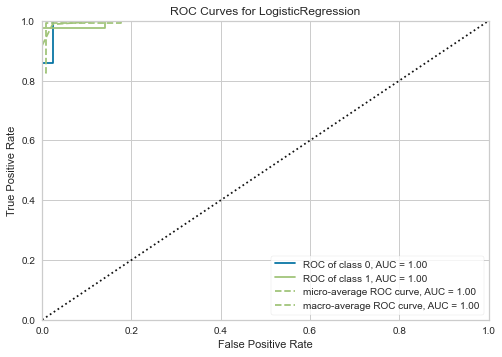

In [28]:
plot_model(lr)

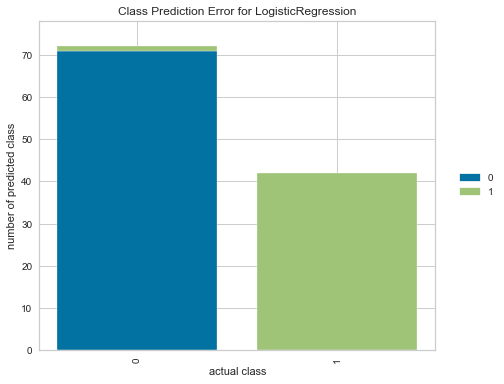

In [29]:
plot_model(lr, plot = 'error')

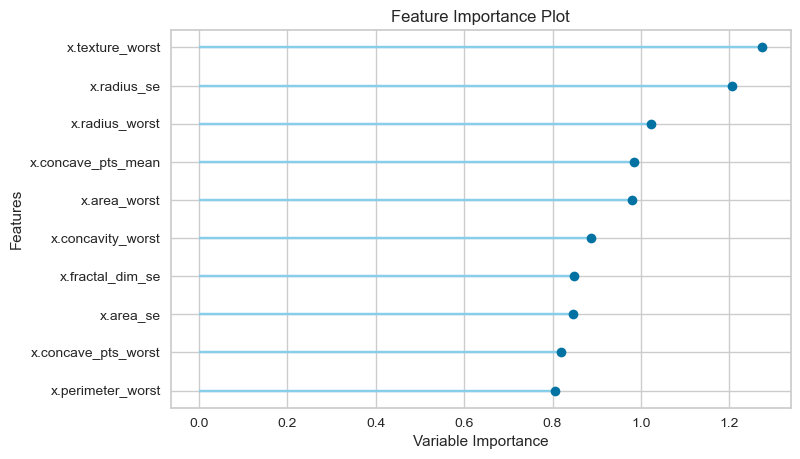

In [30]:
plot_model(lr, plot='feature')

In [31]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [32]:
predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9912,0.9967,0.9767,1.0000,0.9882,0.9812,0.9814


,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,x.radius_se,...,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y,Label,Score
0,0.51,1.28,1.24,-0.39,0.68,0.21,0.30,0.54,-0.28,0.83,...,1.71,0.79,1.44,0.89,1.35,1.34,0.80,1,1,1.00
1,0.71,-0.06,-0.20,1.71,0.42,0.62,0.42,0.10,0.87,0.75,...,-0.14,1.87,0.36,0.50,0.79,0.33,0.50,1,1,1.00
2,-0.61,-0.55,-0.64,0.92,1.25,0.96,0.65,3.23,1.58,-0.30,...,-0.51,0.27,0.97,0.83,1.08,4.86,1.03,1,1,0.88
3,0.74,-0.58,-0.54,-1.06,-1.01,-0.90,-0.95,-0.98,-0.44,-0.63,...,-0.46,-0.32,-0.47,-0.72,-0.79,0.36,-0.12,0,0,0.97
4,0.04,-1.18,-1.02,0.29,-0.14,-0.35,-0.49,0.51,0.06,-0.79,...,-0.91,1.06,-0.16,-0.05,-0.27,-0.44,0.04,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.81,-0.56,-0.60,-1.98,0.05,-0.12,-0.51,-2.25,0.55,-1.00,...,-0.69,-2.03,0.42,0.08,-0.10,-1.17,0.51,0,0,1.00
110,1.76,1.73,1.64,0.19,1.19,0.94,2.01,0.25,-0.37,1.99,...,1.36,-0.22,0.55,0.45,1.51,0.65,-0.43,1,1,1.00
111,1.36,1.59,1.52,0.36,1.04,2.07,1.71,1.46,-0.24,0.31,...,1.21,-0.23,0.83,1.39,0.87,0.71,0.03,1,1,1.00
112,-0.40,3.42,3.85,1.34,2.52,3.10,3.69,0.55,-0.23,2.06,...,4.06,0.93,2.14,1.76,2.43,1.36,0.22,1,1,1.00


In [33]:
final_lr = finalize_model(lr)

#### Python code done by Dennis Lam